In [8]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# chrome://bookmarks/?q=xgboost

In [12]:
dateTimeCol='open_datetime'
dateCol='incident_date'
# cateFeatures=['product_type','brand','incident_type','service_type','is_failure_type']
# numericFeatures=['count_detail','open_to_close_hour','response_to_resolved_hour','open_to_response_hour','resolved_to_close_hour']
colLabel='no_incident'
from_date='2021-01-01'
to_date='2024-01-01'

# Create Index

In [17]:
df_incident = pd.read_csv('incident_data.csv',parse_dates=[dateTimeCol])
df_incident=df_incident.query(f'{dateTimeCol}>=@from_date and {dateTimeCol}<=@to_date')
df_incident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2052
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   severity_label             2053 non-null   object        
 1   sla                        2053 non-null   object        
 2   id                         2053 non-null   int64         
 3   incident_no                2053 non-null   object        
 4   product_type               2053 non-null   object        
 5   brand                      2053 non-null   object        
 6   mode                       2053 non-null   object        
 7   incident_type              2053 non-null   object        
 8   status                     2053 non-null   object        
 9   service_type               2053 non-null   object        
 10  is_failure_type            2053 non-null   bool          
 11  count_detail               2053 non-null   int64         
 12  open_d

In [15]:

df_incident[dateCol]=df_incident[dateCol].dt.strftime('%Y-%m-%d')
df_incident[dateCol]=pd.to_datetime(df_incident[dateCol], format='%Y-%m-%d')
df_incident=df_incident[[dateCol,'id']]

KeyError: 'incident_date'

In [16]:

print(df_incident.info())
print(df_incident.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2052
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   severity_label             2053 non-null   object        
 1   sla                        2053 non-null   object        
 2   id                         2053 non-null   int64         
 3   incident_no                2053 non-null   object        
 4   product_type               2053 non-null   object        
 5   brand                      2053 non-null   object        
 6   mode                       2053 non-null   object        
 7   incident_type              2053 non-null   object        
 8   status                     2053 non-null   object        
 9   service_type               2053 non-null   object        
 10  is_failure_type            2053 non-null   bool          
 11  count_detail               2053 non-null   int64         
 12  open_d

In [112]:


dfCountIncident=df_incident.groupby([dateCol])[['id']].agg('count').reset_index()
dfCountIncident.columns=['incident_date','count_daily_incident']
dfCountIncident.info()
dfCountIncident.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   incident_date         440 non-null    datetime64[ns]
 1   count_daily_incident  440 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.0 KB


,incident_date,count_daily_incident
435,2023-01-25,3
436,2023-01-26,11
437,2023-01-28,2
438,2023-01-29,1
439,2023-01-31,1


In [113]:
to_date=df_incident['incident_date'].max()
to_date=to_date.strftime('%Y-%m-%d')
print(to_date)

2023-01-31


In [114]:
period_index=pd.date_range(start=from_date,end=to_date, freq='D')
dfDate=pd.DataFrame(index=period_index,columns=['date'])
dfDate.reset_index(drop=False,inplace=True)
dfDate['date']=dfDate['index']
dfDate.drop(columns=['index'],inplace=True)
print(dfDate.info())
dfDate.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    761 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.1 KB
None


,date
756,2023-01-27
757,2023-01-28
758,2023-01-29
759,2023-01-30
760,2023-01-31


In [115]:
df=dfDate.merge(dfCountIncident,how='left',left_on='date',right_on='incident_date')
df=df[['date','count_daily_incident']]
df.fillna(value=0,inplace=True)

In [108]:
#df.to_csv('DailyIncident.csv',index=False)

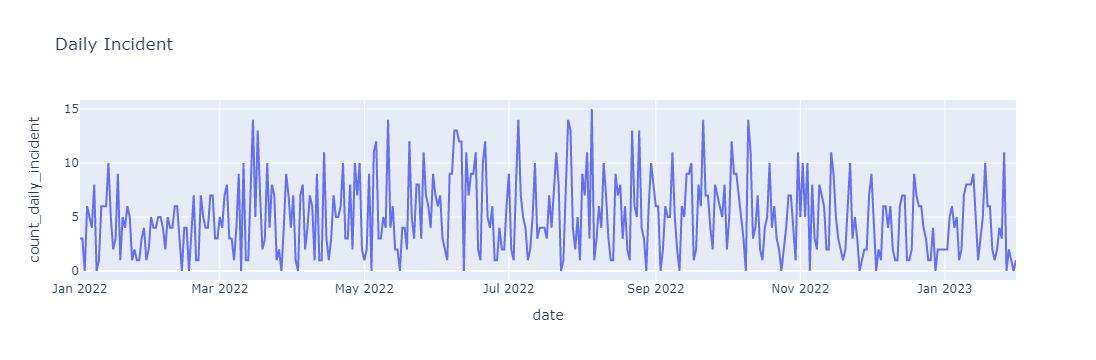

In [118]:
import plotly.express as px
# fig = px.line(df.query("date>='2022-01-01'"), x="date", y='count_daily_incident', title='Daily Incident')
# fig = px.line(df, x="date", y='count_daily_incident', title='Daily Incident')
fig.show()

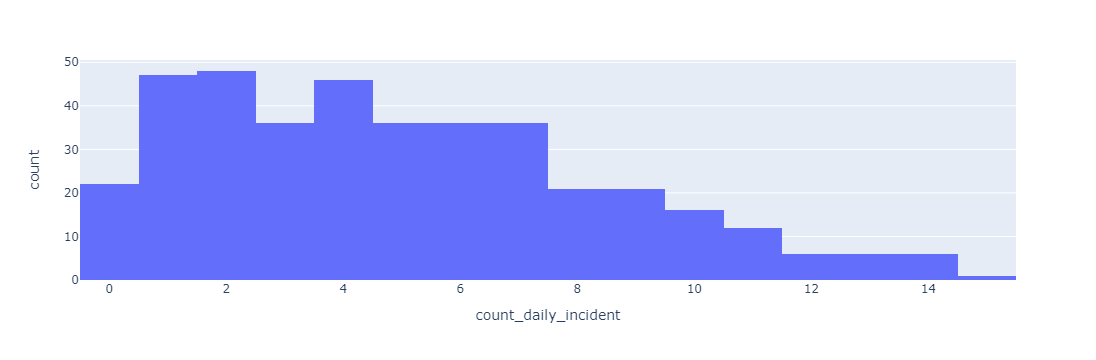

In [119]:

fig = px.histogram(df.query("date>='2022-01-01'"), x="count_daily_incident")
fig.show()